In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [3]:
data = pd.read_csv("../data/heart_disease.csv")
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [4]:
# Check for missing values in each column
print(data.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


In [5]:
# Drop rows with any missing values
data_cleaned = data.dropna()

# Check the shape before and after
print(f"Original data shape: {data.shape}")
print(f"Cleaned data shape: {data_cleaned.shape}")


Original data shape: (303, 14)
Cleaned data shape: (297, 14)


In [6]:
categorical_cols = ['cp', 'restecg', 'slope', 'thal', 'ca', 'sex', 'fbs', 'exang']

data_encoded = pd.get_dummies(data_cleaned, columns=categorical_cols)

data_encoded.head()


,age,trestbps,chol,thalach,oldpeak,num,cp_1,cp_2,cp_3,cp_4,...,ca_0.0,ca_1.0,ca_2.0,ca_3.0,sex_0,sex_1,fbs_0,fbs_1,exang_0,exang_1
0,63,145,233,150,2.3,0,True,False,False,False,...,True,False,False,False,False,True,False,True,True,False
1,67,160,286,108,1.5,2,False,False,False,True,...,False,False,False,True,False,True,True,False,False,True
2,67,120,229,129,2.6,1,False,False,False,True,...,False,False,True,False,False,True,True,False,False,True
3,37,130,250,187,3.5,0,False,False,True,False,...,True,False,False,False,False,True,True,False,True,False
4,41,130,204,172,1.4,0,False,True,False,False,...,True,False,False,False,True,False,True,False,True,False


In [7]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns to scale
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

scaler = StandardScaler()

# Fit scaler on numerical columns and transform
data_encoded[num_cols] = scaler.fit_transform(data_encoded[num_cols])

# Check scaled data
data_encoded.head()


,age,trestbps,chol,thalach,oldpeak,num,cp_1,cp_2,cp_3,cp_4,...,ca_0.0,ca_1.0,ca_2.0,ca_3.0,sex_0,sex_1,fbs_0,fbs_1,exang_0,exang_1
0,0.936181,0.750380,-0.276443,0.017494,1.068965,0,True,False,False,False,...,True,False,False,False,False,True,False,True,True,False
1,1.378929,1.596266,0.744555,-1.816334,0.381773,2,False,False,False,True,...,False,False,False,True,False,True,True,False,False,True
2,1.378929,-0.659431,-0.353500,-0.899420,1.326662,1,False,False,False,True,...,False,False,True,False,False,True,True,False,False,True
3,-1.941680,-0.095506,0.051047,1.633010,2.099753,0,False,False,True,False,...,True,False,False,False,False,True,True,False,True,False
4,-1.498933,-0.095506,-0.835103,0.978071,0.295874,0,False,True,False,False,...,True,False,False,False,True,False,True,False,True,False


In [8]:
from sklearn.model_selection import train_test_split

# Features (drop target column 'num')
X = data_encoded.drop('num', axis=1)

# Target variable
y = data_encoded['num']

# Split data: 80% train, 20% test, stratify by y to keep class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 237 samples
Testing set size: 60 samples


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Test Accuracy: {accuracy:.4f}")


Logistic Regression Test Accuracy: 0.6500


In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

# Calculate metrics
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Prepare for ROC curve (binarize output)
classes = sorted(y.unique())
y_test_binarized = label_binarize(y_test, classes=classes)
y_score = model.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i, cls in enumerate(classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for all classe


Precision: 0.5556
Recall: 0.6500
F1-score: 0.5852


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42, probability=True)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")


Decision Tree Accuracy: 0.5333
Random Forest Accuracy: 0.5500
Support Vector Machine Accuracy: 0.5333


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Create a pipeline with scaling and classifier
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42))
])

# Define parameter grid to search
param_grid = {
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [None, 5, 10],
    'clf__min_samples_split': [2, 5, 10]
}

# Setup GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Test accuracy with best estimator
best_model = grid_search.best_estimator_
test_acc = best_model.score(X_test, y_test)
print(f"Test accuracy with best parameters: {test_acc:.4f}")


Best parameters: {'clf__max_depth': 5, 'clf__min_samples_split': 5, 'clf__n_estimators': 50}
Best cross-validation accuracy: 0.5949
Test accuracy with best parameters: 0.5667


In [13]:
import joblib

# Save the best model pipeline to a file in 'models' folder
joblib.dump(best_model, "../models/best_rf_model.pkl")

print("Model saved successfully!")


Model saved successfully!


In [14]:
import joblib

# Load the saved model pipeline
loaded_model = joblib.load("../models/best_rf_model.pkl")

# Use the loaded model to predict on test data
predictions = loaded_model.predict(X_test)

print("Predictions from loaded model:")
print(predictions)


Predictions from loaded model:
[0 0 0 0 0 0 0 0 2 0 1 0 0 2 1 1 0 0 1 3 0 0 0 0 2 0 0 1 0 3 0 2 1 0 0 2 0
 1 0 0 0 2 0 0 0 0 3 0 1 0 0 0 0 0 1 0 1 0 0 0]


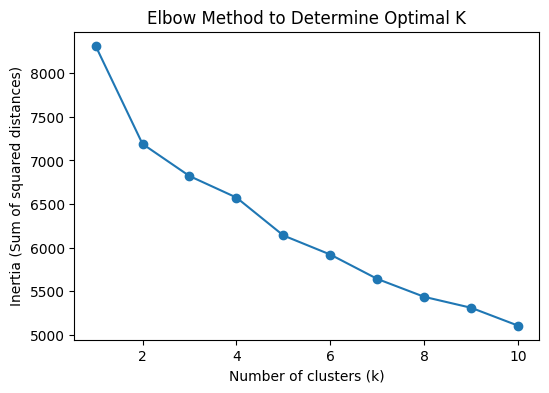

In [16]:
# 5. Unsupervised Learning - Clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming 'data_encoded' is your preprocessed dataframe with features
# Drop the target column 'num' to get features only
X = data_encoded.drop('num', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Assuming X_scaled is your scaled features (from preprocessing)
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method to Determine Optimal K")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (Sum of squared distances)")
plt.show()


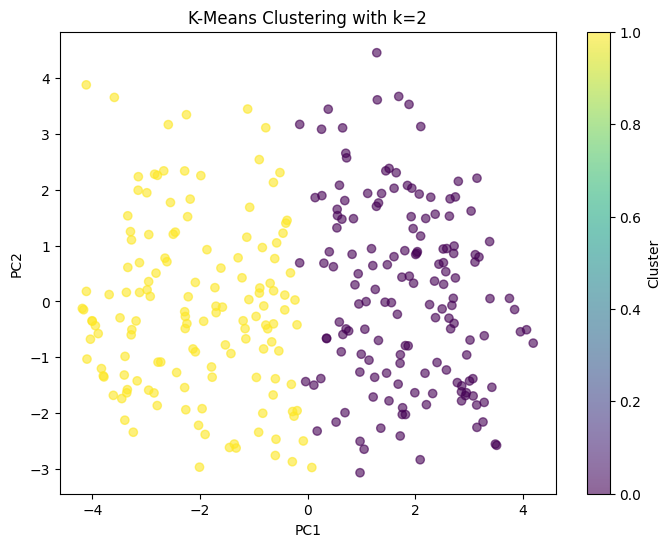

Cluster counts vs Heart Disease labels:
num        0   1   2   3   4
cluster                     
0        134  20   1   1   0
1         26  34  34  34  13


In [17]:
# Replace k=2 with your chosen number
optimal_k = 2

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans_final.fit_predict(X_scaled)

# Add cluster labels to your dataframe
data_encoded['cluster'] = clusters

# Visualize clusters using PCA (2 components)
from sklearn.decomposition import PCA

pca_vis = PCA(n_components=2)
X_pca_vis = pca_vis.fit_transform(X_scaled)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_vis[:, 0], X_pca_vis[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'K-Means Clustering with k={optimal_k}')
plt.colorbar(label='Cluster')
plt.show()

# Compare clusters to actual labels
print("Cluster counts vs Heart Disease labels:")
print(pd.crosstab(data_encoded['cluster'], data_encoded['num']))


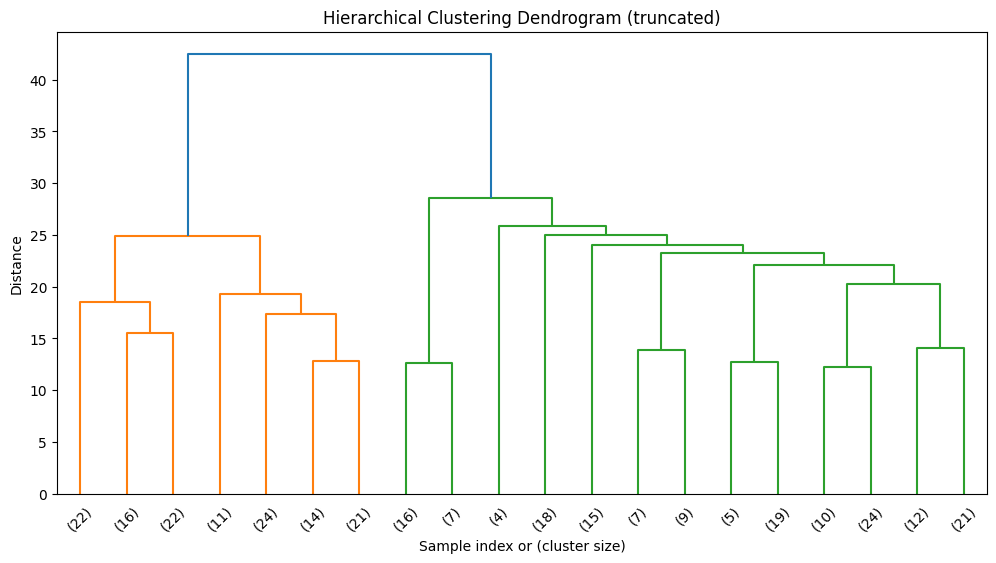

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Compute the linkage matrix
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=20, leaf_rotation=45, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.show()


In [19]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

# Choose number of clusters (e.g., same as K-Means optimal_k)
n_clusters = 2  # adjust as needed

agg_clust = AgglomerativeClustering(n_clusters=n_clusters)
clusters_agg = agg_clust.fit_predict(X_scaled)

# Add these cluster labels to your dataframe
data_encoded['agg_cluster'] = clusters_agg

# Compare cluster assignments to actual labels
print("Agglomerative Clustering vs Heart Disease Labels:")
print(pd.crosstab(data_encoded['agg_cluster'], data_encoded['num']))


Agglomerative Clustering vs Heart Disease Labels:
num            0   1   2   3   4
agg_cluster                     
0             50  38  32  34  13
1            110  16   3   1   0
